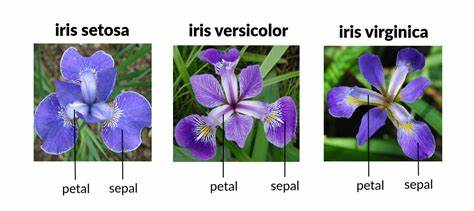

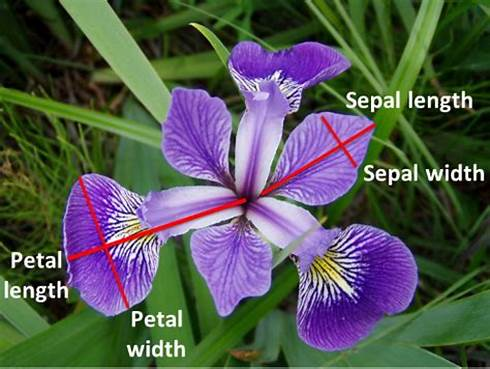

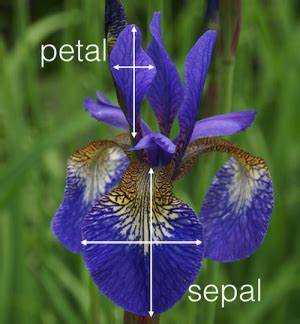

# 1. Loading the Iris Dataset

This code section is related to load data and its statistics

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numeric species to actual species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# 2. Handling Missing Values

In [4]:
import numpy as np

# Introduce missing values in the dataset for demonstration
iris_df.loc[5:10, 'sepal length (cm)'] = np.nan

# Check for missing values
print(iris_df.isnull().sum())

# Handling missing values
# Impute missing values with themean of the column
iris_df['sepal length (cm)'].fillna(iris_df['sepal length (cm)'].mean(), inplace=True)

# Verify that missing values are handled
print(iris_df.isnull().sum())


sepal length (cm)    6
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


# 3. Feature Engineering

In [5]:
# Create a new feature 'petal length to width ratio'
iris_df['petal_length_to_width_ratio'] = iris_df['petal length (cm)'] / iris_df['petal width (cm)']

# Display the updated dataframe
print(iris_df.head())

#Save data to .csv file and show it

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  petal_length_to_width_ratio  
0  setosa                          7.0  
1  setosa                          7.0  
2  setosa                          6.5  
3  setosa                          7.5  
4  setosa                          7.0  


# 4. Data Visualization

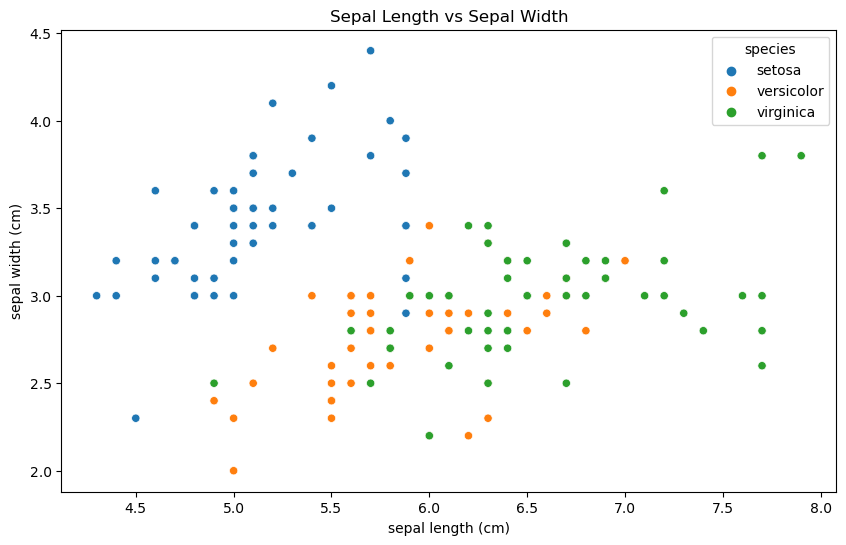

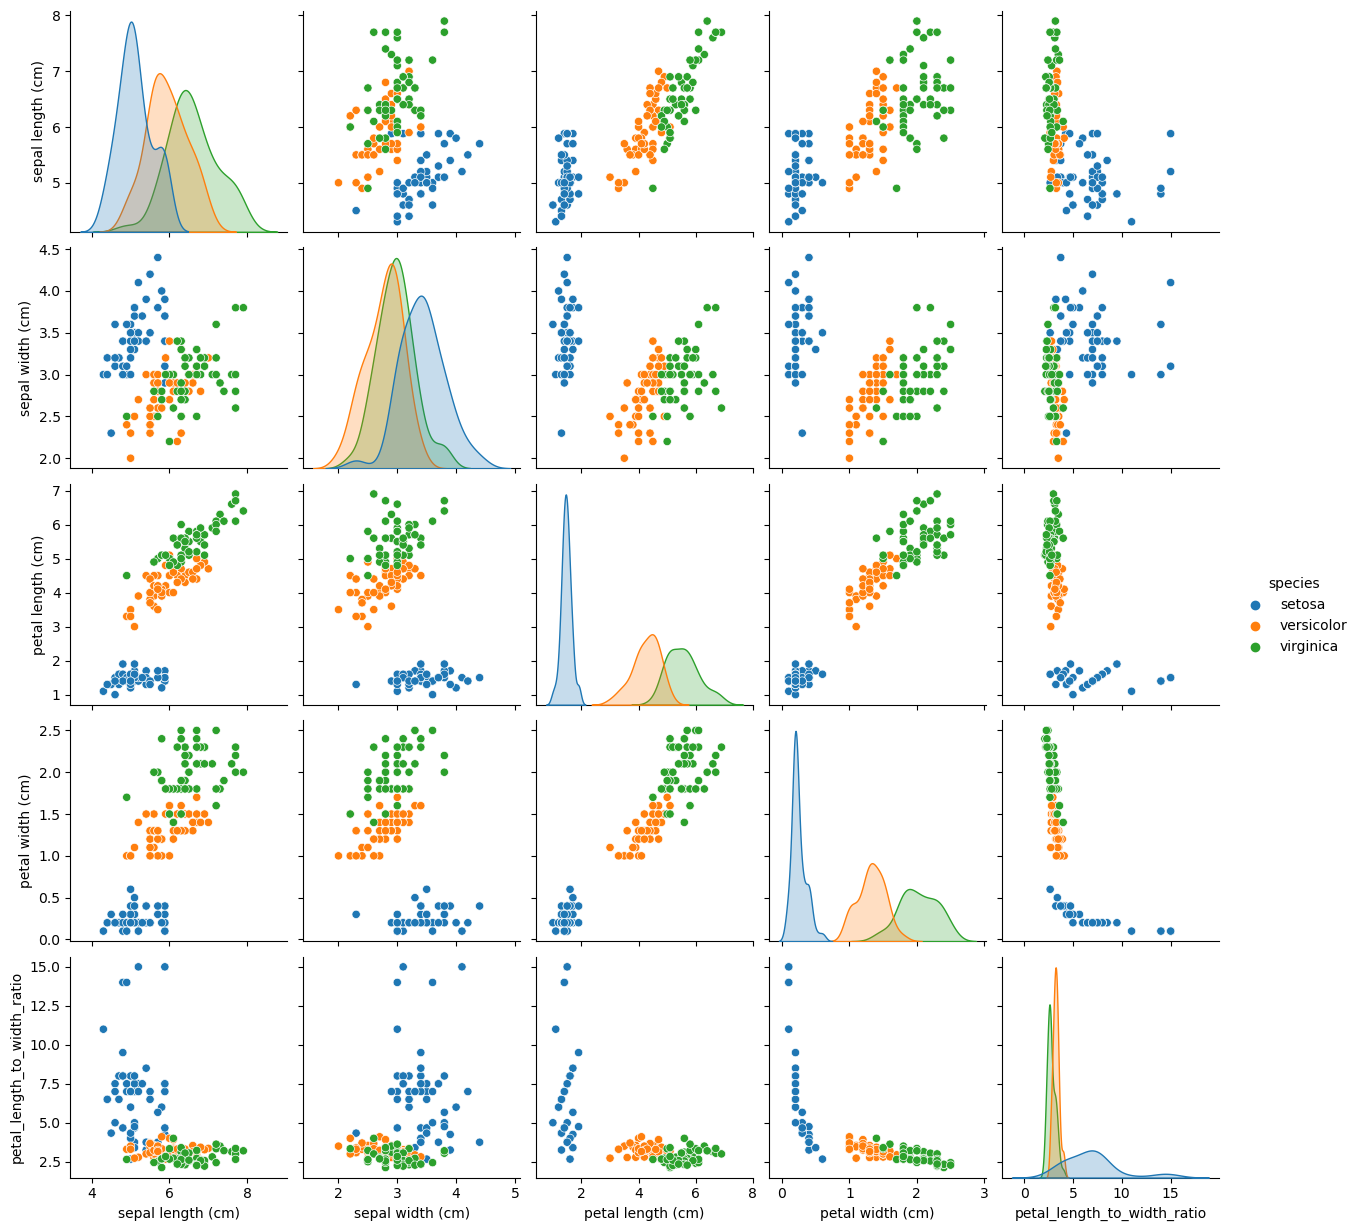

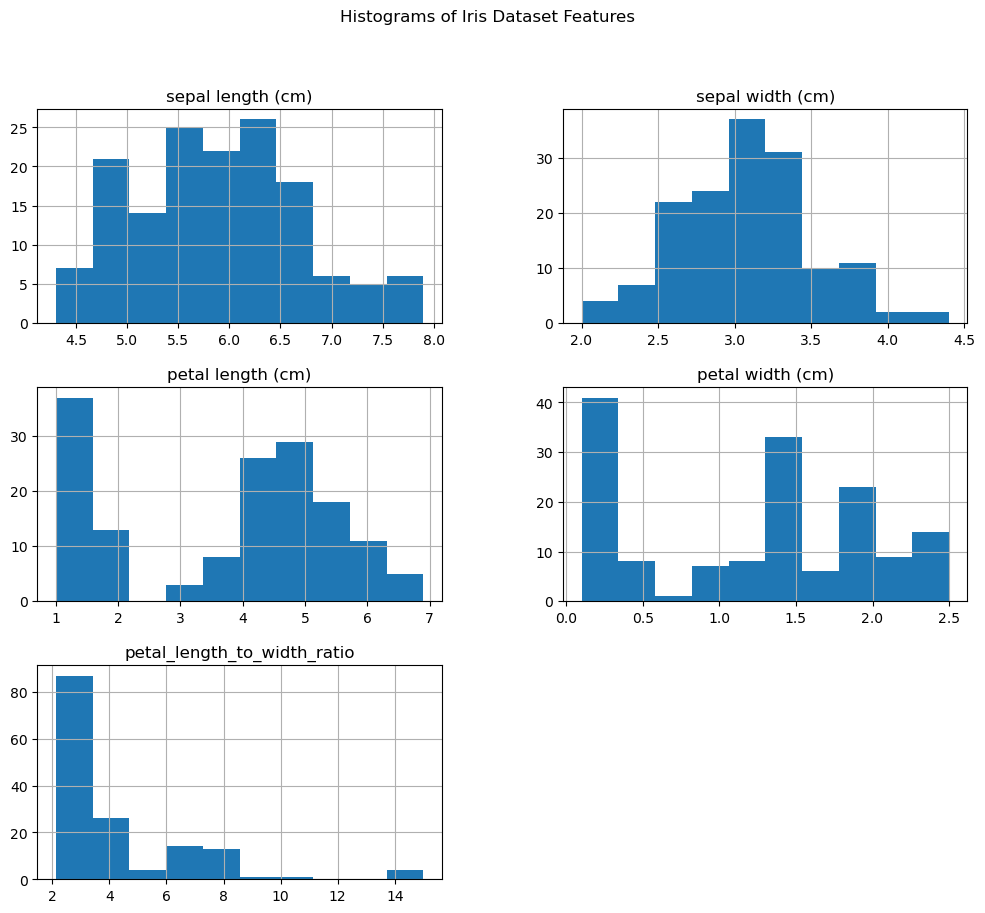

In [6]:
# Scatter plot of sepal length vs sepal width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(iris_df, hue='species')
plt.show()

# Histograms for each feature
iris_df.drop('species', axis=1).hist(figsize=(12, 10))
plt.suptitle('Histograms of Iris Dataset Features')
plt.show()


# 5. Feature Scaling (Optional)

In [7]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.973943          1.019004          -1.340227         -1.315444   
1          -1.223494         -0.131979          -1.340227         -1.315444   
2          -1.473046          0.328414          -1.397064         -1.315444   
3          -1.597821          0.098217          -1.283389         -1.315444   
4          -1.098719          1.249201          -1.340227         -1.315444   

   petal_length_to_width_ratio  
0                     1.083892  
1                     1.083892  
2                     0.882388  
3                     1.285397  
4                     1.083892  


# Problem 1: Outlier Detection and Removal

In [7]:
# Check data types of the columns
print(iris_df.dtypes)

sepal length (cm)              float64
sepal width (cm)               float64
petal length (cm)              float64
petal width (cm)               float64
species                         object
petal_length_to_width_ratio    float64
dtype: object


In [11]:
# Select only numeric columns for outlier detection
numeric_cols = iris_df.select_dtypes(include=[np.number]).columns
numeric_data = iris_df[numeric_cols]
print(numeric_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     petal_length_to_width_

In [8]:
# Check for missing values
print(numeric_data.isnull().sum())

# Optionally, impute missing values
numeric_data.fillna(numeric_data.mean(), inplace=True)


NameError: name 'numeric_data' is not defined

In [9]:
from scipy import stats

# Calculate Z-scores for numeric features
z_scores = np.abs(stats.zscore(numeric_data))

# Define a threshold for outliers
threshold = 3

# Identify rows where any feature has a Z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
clean_iris_df = iris_df[~outliers]

print(f"Original dataset size: {iris_df.shape[0]}")
print(f"Cleaned dataset size: {clean_iris_df.shape[0]}")


NameError: name 'numeric_data' is not defined

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings

# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numeric species to actual species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Check data types
print("Data types:")
print(iris_df.dtypes)

# Select only numeric columns for outlier detection
numeric_cols = iris_df.select_dtypes(include=[np.number]).columns
numeric_data = iris_df[numeric_cols]

# Check for missing values
print("Missing values in numeric columns:")
print(numeric_data.isnull().sum())

# Optionally, impute missing values
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Calculate Z-scores for numeric features
z_scores = np.abs(stats.zscore(numeric_data))

# Define a threshold for outliers
threshold = 3

# Identify rows where any feature has a Z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
clean_iris_df = iris_df[~outliers]

print(f"Original dataset size: {iris_df.shape[0]}")
print(f"Cleaned dataset size: {clean_iris_df.shape[0]}")
warnings.filterwarnings('ignore')


Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object
Missing values in numeric columns:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Original dataset size: 150
Cleaned dataset size: 149


C:\Users\Hp\AppData\Local\Temp\ipykernel_11256\1375645956.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(numeric_data.mean(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_11256\1375645956.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(numeric_data.mean(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_11256\1375645956.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each feature
for feature in iris.feature_names:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Species', y=feature, data=numeric_data)
    plt.title(f'Box Plot of {feature}')
    plt.show()

ValueError: Could not interpret input 'Species'

<Figure size 1000x500 with 0 Axes>

# Problem 2: Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'species' column
iris_df['species_encoded'] = le.fit_transform(iris_df['species'])

# Display the updated dataframe
print(iris_df.head(90))


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
85                6.0               3.4                4.5               1.6   
86                6.7               3.1                4.7               1.5   
87                6.3               2.3                4.4               1.3   
88                5.6               3.0                4.1               1.3   
89                5.5               2.5                4.0               1.3   

       species  species_encoded  
0    

# Problem 3: Correlation Analysis

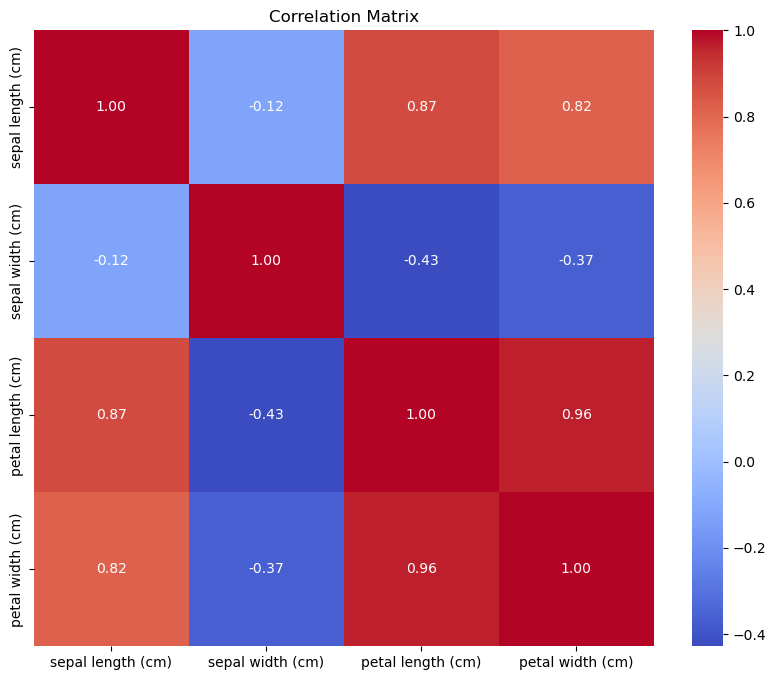

In [20]:
# Calculate correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()  # Exclude 'species' column

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Problem 4: Feature Selection using Recursive Feature Elimination (RFE)


In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(max_iter=200)

# Initialize RFE
rfe = RFE(model, n_features_to_select=2)

# Fit RFE
fit = rfe.fit(X, y)

# Display the ranking of features
features = X.columns
for i in range(len(fit.support_)):
    print(f"Feature: {features[i]}, Rank: {fit.ranking_[i]}")


Feature: sepal length (cm), Rank: 4
Feature: sepal width (cm), Rank: 3
Feature: petal length (cm), Rank: 1
Feature: petal width (cm), Rank: 1
Feature: petal_length_to_width_ratio, Rank: 2


# Problem 5: Data Normalization


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Define MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Display the first few rows of normalized features
print(pd.DataFrame(X_normalized, columns=X.columns).head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   petal_length_to_width_ratio  
0                     0.378641  
1                     0.378641  
2                     0.339806  
3                     0.417476  
4                     0.378641  


# Problem 6: Dimensionality Reduction using PCA


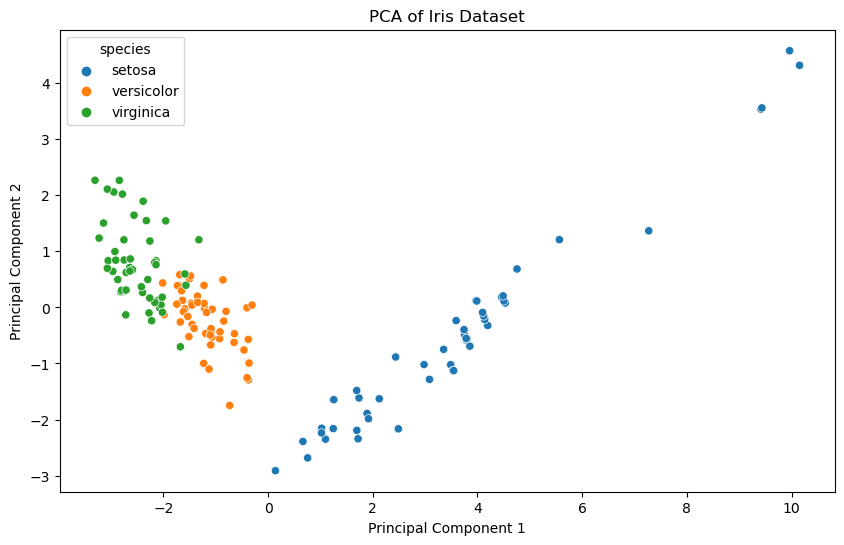

In [16]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['species'] = y

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='species')
plt.title('PCA of Iris Dataset')
plt.show()


# Problem 7: Handling Class Imbalance


In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution
print(Counter(y))

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(Counter(y_resampled))


Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})
Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})


# Problem 8: Feature Engineering - Polynomial Features


In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Fit and transform the data
X_poly = poly.fit_transform(X)

# Display the shape of the new feature set
print(f"Original feature set shape: {X.shape}")
print(f"Polynomial feature set shape: {X_poly.shape}")


Original feature set shape: (150, 5)
Polynomial feature set shape: (150, 21)


In [19]:
# Check data types of the columns
print(iris_df.dtypes)

sepal length (cm)              float64
sepal width (cm)               float64
petal length (cm)              float64
petal width (cm)               float64
species                         object
petal_length_to_width_ratio    float64
species_encoded                  int32
dtype: object
